In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns
from metpy.calc import dewpoint_from_relative_humidity
from metpy.calc import specific_humidity_from_dewpoint
from metpy.units import units
import dask

/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
############################################################# read er5 data ##################################################################################

In [3]:
ds_era5_JJ = xr.open_dataset('/home/kit/imktro/gj5173/ai-models/data/era5_2021-JJ.nc')
ds_era5_JJ_rh = ds_era5_JJ['var157']

In [4]:
ds_era5_JJ_rh_landbox = ds_era5_JJ_rh[:,:,164:123:-1,940:981] #area from 49N-59N,115W-125W
ds_era5_JJ_rh_landbox_mean = np.mean(ds_era5_JJ_rh[:,:,164:123:-1,940:981],axis=(-1,-2))

In [5]:
ds_era5_JJ_rh_landbox_mean 

<xarray.DataArray 'var157' (time: 22, plev: 13)> Size: 1kB
array([[ 0.9999448 ,  1.4911895 ,  2.387262  , 18.581043  , 67.58077   ,
        69.96948   , 58.65072   , 57.6412    , 71.15915   , 77.24449   ,
        48.14235   , 42.818226  , 42.726227  ],
       [ 0.9955789 ,  1.9994751 ,  2.025275  , 20.317549  , 73.02456   ,
        87.11997   , 73.69425   , 51.96757   , 63.778248  , 71.65956   ,
        51.99385   , 46.861     , 46.589127  ],
       [ 0.8721505 ,  1.479013  ,  1.291745  ,  5.675319  , 30.31988   ,
        68.03329   , 72.55144   , 64.6217    , 70.21069   , 78.7099    ,
        70.12088   , 66.66023   , 67.380554  ],
       [ 0.90282416,  1.3488379 ,  1.5453944 ,  4.979146  , 46.235325  ,
        70.47261   , 71.25929   , 59.012707  , 59.632744  , 75.64363   ,
        57.84097   , 54.768883  , 54.89113   ],
       [ 0.94069254,  1.5355588 ,  1.9555138 , 20.057114  , 78.44439   ,
        77.924484  , 70.26615   , 64.606     , 69.64861   , 73.67926   ,
        54.856857  , 50.50307   , 49.871365  ],
       [ 0.9285753 ,  1.6061531 ,  1.851075  , 25.16152   , 58.6722    ,
        68.432     , 68.529305  , 63.7064    , 69.955574  , 66.72442   ,
        53.4367    , 47.73484   , 46.901184  ],
       [ 0.87822634,  1.7526432 ,  6.5056005 , 15.228589  , 45.458256  ,
        45.350266  , 37.85337   , 41.12988   , 58.805798  , 73.49896   ,
...
        29.649776  , 26.648804  , 28.63358   , 36.19309   , 43.09462   ,
        30.56386   , 25.768486  , 25.268915  ],
       [ 1.0997198 ,  4.468241  , 15.3692665 , 46.43735   , 51.46483   ,
        25.393456  , 14.265994  , 19.696306  , 35.511375  , 31.291555  ,
        24.876398  , 21.782677  , 21.347458  ],
       [ 1.0134368 ,  3.511214  ,  9.883149  , 55.161205  , 64.78438   ,
        45.06697   , 28.369463  , 42.815697  , 44.93332   , 33.513042  ,
        37.28666   , 32.24063   , 31.33006   ],
       [ 1.0937898 ,  2.7263296 ,  5.044015  , 41.602135  , 63.6064    ,
        60.623554  , 38.881565  , 38.42498   , 48.339     , 58.305668  ,
        61.86999   , 54.918976  , 54.069733  ],
       [ 1.0712028 ,  2.3429236 ,  4.21556   , 34.31665   , 56.49364   ,
        54.623226  , 46.88381   , 33.27955   , 39.778645  , 59.657978  ,
        50.35672   , 45.96413   , 45.08744   ],
       [ 0.9543784 ,  2.0506804 ,  3.2526085 ,  9.920475  , 44.399887  ,
        65.11286   , 47.91766   , 58.914993  , 71.16445   , 73.00001   ,
        57.91595   , 50.421726  , 48.920174  ],
       [ 0.93488926,  1.8595772 ,  2.7307856 , 15.100965  , 65.00243   ,
        57.765923  , 47.477303  , 50.524807  , 61.718594  , 67.87063   ,
        58.288204  , 49.7985    , 48.44239   ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 176B 2021-06-14 2021-06-15 ... 2021-07-05
  * plev     (plev) float64 104B 5e+03 1e+04 1.5e+04 ... 8.5e+04 9.25e+04 1e+05

FileNotFoundError: [Errno 2] No such file or directory: '/home/kit/imk-tro/gj5173/vertical_moisture/rh_era.png'

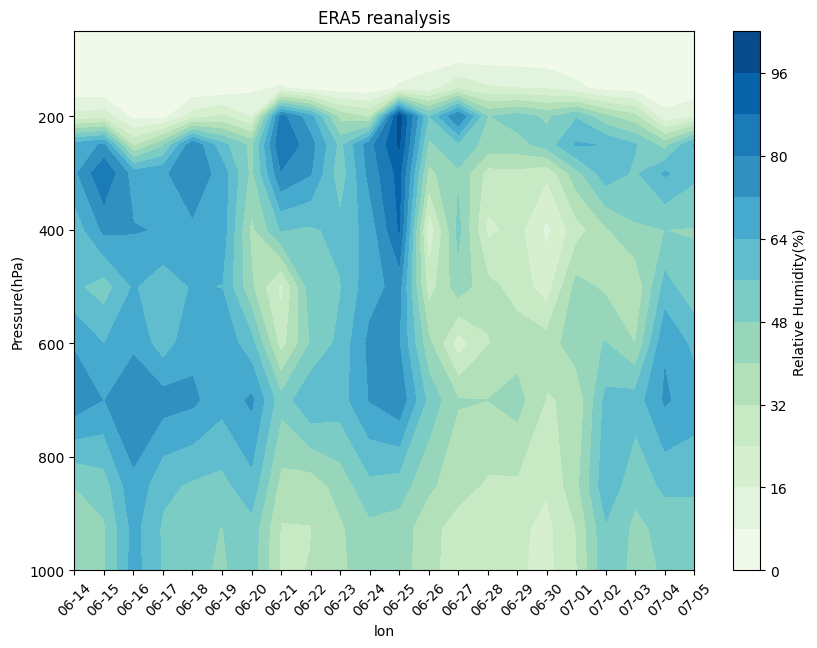

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 7))

# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times= ds_era5_JJ_rh_landbox_mean   .time # datetime array
levels = ds_era5_JJ_rh_landbox_mean   .plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_era5_JJ_rh_landbox_mean.T   # Adjust Z as per your data

c = ax.contourf(X, Y, Z, cmap='GnBu',levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Relative Humidity(%)')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Labels and title
ax.set_xlabel('lon')
ax.set_ylabel('Pressure(hPa)')
ax.set_title('ERA5 reanalysis')
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.savefig('/home/kit/imk-tro/gj5173/vertical_moisture/rh_era.png', bbox_inches='tight',dpi=200)
plt.show()

In [5]:
############################################################ load the climatology  #####################################################################################

In [17]:
levels = [10000, 20000,25000,30000,40000,50000,60000,70000,80000,85000,90000]
base_pattern = '/home/kit/imktro/gj5173/tmp/clim_RH{level}_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point'
datasets = []

for level in levels:
    filename = base_pattern.format(level=level)  
    ds = xr.open_dataset(filename,engine='netcdf4')
    datasets.append(ds)

ds_clim_RH_100_900 = xr.concat(datasets, dim='plev')

In [8]:
ds_clim_RH_100_900

<xarray.Dataset> Size: 2MB
Dimensions:  (plev: 11, lat: 110, lon: 240)
Coordinates:
  * lon      (lon) float32 960B -180.0 -179.5 -179.0 ... -61.5 -61.0 -60.5
  * lat      (lat) float32 440B 25.0 25.5 26.0 26.5 27.0 ... 78.0 78.5 79.0 79.5
  * plev     (plev) float64 88B 1e+04 2e+04 2.5e+04 ... 8e+04 8.5e+04 9e+04
Data variables:
    RH       (plev, lat, lon) float64 2MB 14.09 13.94 13.73 ... 62.35 60.93

In [13]:
levels = [10000, 20000,25000,30000,40000,50000,60000,70000,80000,85000,90000]
base_pattern = '/home/kit/imktro/gj5173/tmp/clim_T{level}_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point'
datasets = []

for level in levels:
    filename = base_pattern.format(level=level)  
    ds = xr.open_dataset(filename,engine='netcdf4')
    datasets.append(ds)

ds_clim_T_100_900 = xr.concat(datasets, dim='plev')

In [14]:
'''###############THIS IS NOT THE RIGHT METHOD TO CALCUATE THE CLIMATOLOGY OF RELATIVE HUMIDITY， STILL NEED TO COMPUTE YEAR BY YEAR###################################
from metpy.calc import relative_humidity_from_specific_humidity
from metpy.units import units
ds_clim_R_100_900 = relative_humidity_from_specific_humidity(ds_clim_T_100_900.plev * units.Pa,ds_clim_T_100_900.T * units.kelvin, ds_clim_Q_100_900.Q)

ds_clim_R_L9_landbox = ds_clim_R_100_900.isel(plev=[0,1,2,3,4,5,6,7,9],lat =slice(48, 69),lon=slice(110,131))
ds_clim_R_L9_landbox_mean = np.mean(ds_clim_R_L9_landbox,axis=(-1,-2))

ds_clim_R_L9_landbox_mean

ds_era5_rh_L9_landbox_mean = ds_era5_JJ_rh_landbox_mean[:,[1, 3, 4, 5, 6, 7, 8, 9, 10]]
ds_anomaly_R_L9_landbox_mean = ds_era5_rh_L9_landbox_mean - ds_clim_R_L9_landbox_mean.values*100

ds_anomaly_R_L9_landbox_mean'''

'###############THIS IS NOT THE RIGHT METHOD TO CALCUATE THE CLIMATOLOGY OF RELATIVE HUMIDITY， STILL NEED TO COMPUTE YEAR BY YEAR###################################\nfrom metpy.calc import relative_humidity_from_specific_humidity\nfrom metpy.units import units\nds_clim_R_100_900 = relative_humidity_from_specific_humidity(ds_clim_T_100_900.plev * units.Pa,ds_clim_T_100_900.T * units.kelvin, ds_clim_Q_100_900.Q)\n\nds_clim_R_L9_landbox = ds_clim_R_100_900.isel(plev=[0,1,2,3,4,5,6,7,9],lat =slice(48, 69),lon=slice(110,131))\nds_clim_R_L9_landbox_mean = np.mean(ds_clim_R_L9_landbox,axis=(-1,-2))\n\nds_clim_R_L9_landbox_mean\n\nds_era5_rh_L9_landbox_mean = ds_era5_JJ_rh_landbox_mean[:,[1, 3, 4, 5, 6, 7, 8, 9, 10]]\nds_anomaly_R_L9_landbox_mean = ds_era5_rh_L9_landbox_mean - ds_clim_R_L9_landbox_mean.values*100\n\nds_anomaly_R_L9_landbox_mean'

In [15]:
ds_clim_RH_L9_landbox

NameError: name 'ds_clim_RH_L9_landbox' is not defined

In [16]:
ds_clim_RH_L9_landbox_mean = ds_clim_RH_L9_landbox.mean(dim=('lat','lon'))

NameError: name 'ds_clim_RH_L9_landbox' is not defined

In [18]:
ds_clim_RH_L9_landbox = ds_clim_RH_100_900.isel(plev=[0,1,2,3,4,5,6,7,9],lat =slice(48, 69),lon=slice(110,131))
ds_clim_RH_L9_landbox_mean = ds_clim_RH_L9_landbox.mean(dim=('lat','lon'))
ds_era5_rh_L9_landbox_mean = ds_era5_JJ_rh_landbox_mean[:,[1, 3, 4, 5, 6, 7, 8, 9, 10]]
ds_anomaly_RH_L9_landbox_mean = ds_era5_rh_L9_landbox_mean - ds_clim_RH_L9_landbox_mean

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [28]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:060E60-10:0012C7-20:1136C4-30:0B90EF-40:89B6E2-50:FFFFFF-50:FFFFFF-60:FFFFFF-70:FED4C4-80:FD9B82-90:BF5145-95:8D1F00
    (0.000, (0.024, 0.055, 0.376)),
    (0.050, (0.024, 0.055, 0.376)),
    (0.100, (0.000, 0.071, 0.780)),
    (0.200, (0.067, 0.212, 0.769)),
    (0.300, (0.043, 0.565, 0.937)),
    (0.400, (0.537, 0.714, 0.886)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.600, (1.000, 1.000, 1.000)),
    (0.700, (0.996, 0.831, 0.769)),
    (0.800, (0.992, 0.608, 0.510)),
    (0.900, (0.749, 0.318, 0.271)),
    (0.950, (0.553, 0.122, 0.000)),
    (1.000, (0.553, 0.122, 0.000))))

In [42]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

cmap=my_gradient
my_gradient_1 = shiftedColorMap(cmap, midpoint=0.65, name='shifted_24')

/scratch/slurm_tmpdir/job_23779144/ipykernel_746869/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


In [36]:
ds_anomaly_RH_L9_landbox_mean

<xarray.Dataset> Size: 2kB
Dimensions:  (plev: 9, time: 22)
Coordinates:
  * plev     (plev) float64 72B 1e+04 2e+04 2.5e+04 ... 6e+04 7e+04 8.5e+04
  * time     (time) datetime64[ns] 176B 2021-06-14 2021-06-15 ... 2021-07-05
Data variables:
    RH       (time, plev) float64 2kB 0.6368 2.566 27.53 ... 3.903 -2.389 2.919

In [37]:
ds_anomaly_RH_L9_landbox_mean.time

<xarray.DataArray 'time' (time: 22)> Size: 176B
array(['2021-06-14T00:00:00.000000000', '2021-06-15T00:00:00.000000000',
       '2021-06-16T00:00:00.000000000', '2021-06-17T00:00:00.000000000',
       '2021-06-18T00:00:00.000000000', '2021-06-19T00:00:00.000000000',
       '2021-06-20T00:00:00.000000000', '2021-06-21T00:00:00.000000000',
       '2021-06-22T00:00:00.000000000', '2021-06-23T00:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2021-06-25T00:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-07-03T00:00:00.000000000',
       '2021-07-04T00:00:00.000000000', '2021-07-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 176B 2021-06-14 2021-06-15 ... 2021-07-05
Attributes:
    standard_name:  time
    axis:           T

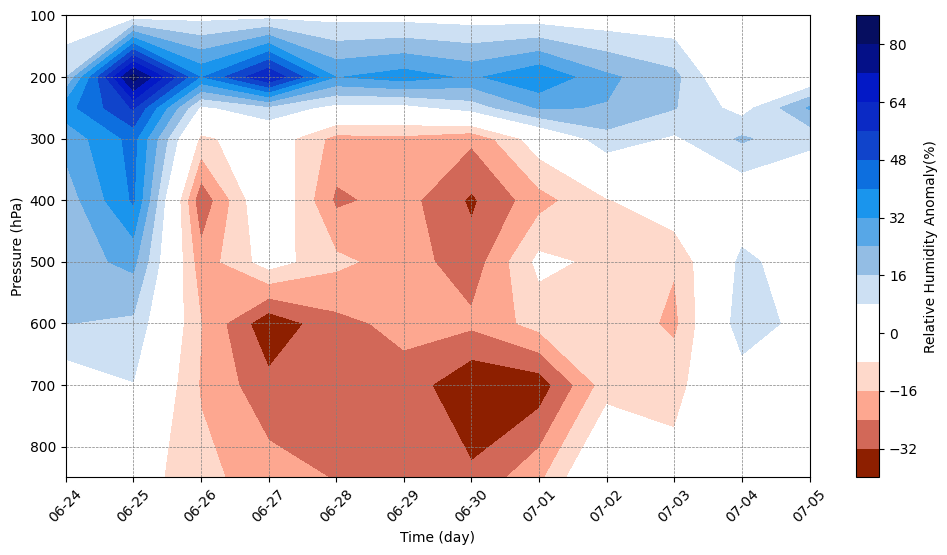

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))
my_gradient_1_reversed = my_gradient_1.reversed()
# Assuming ds_era5_JJ_T_landbox_mean and ds_era5_JJ_T_landbox are your data arrays
times= ds_anomaly_RH_L9_landbox_mean.time[10:22] # datetime array
levels = ds_anomaly_RH_L9_landbox_mean.plev/100  # vertical levels array, inverted if needed

# Assuming X, Y grids for contourf; adjust as per your data structure
X, Y = np.meshgrid(mdates.date2num(times), levels)
Z = ds_anomaly_RH_L9_landbox_mean.RH.T  # Adjust Z as per your data

c = ax.contourf(X, Y, Z[:,10:22], cmap=my_gradient_1_reversed,levels=15)

# Add color bar
fig.colorbar(c, ax=ax, label='Relative Humidity Anomaly(%)', extend='both')

# Set x-axis major locator and formatter for dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Labels and title
ax.set_xlabel('Time (day)')
ax.set_ylabel('Pressure (hPa)')
#ax.set_title('ERA5 reanalysis')
ax.grid(True)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.invert_yaxis()
# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.savefig('/home/kit/imktro/gj5173/result_26_05/rh_era_anomaly_samll_reversed.png', bbox_inches='tight',dpi=200)
plt.show()

In [ ]:
#PUT ALL THE RH,SH,T ERA5 REANALYSISI IN THE SAME SUBPLOT

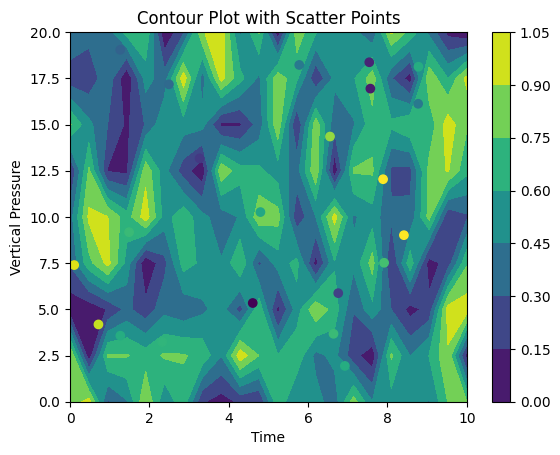

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
# First dataset (contour plot)
x_contour = np.linspace(0, 10, 22)  # Time
y_contour = np.linspace(0, 20, 9)    # Vertical pressure
X_contour, Y_contour = np.meshgrid(x_contour, y_contour)
Z_contour = np.random.rand(9, 22)    # Example data for contour plot

# Second dataset (scatter points)
x_scatter = np.random.uniform(0, 10, 22)   # Time
y_scatter = np.random.uniform(0, 20, 22)   # Vertical pressure
z_scatter = np.random.rand(22)            # Example data for scatter plot

# Plot contour plot
plt.contourf(X_contour, Y_contour, Z_contour)
plt.colorbar()  # Add color bar

# Plot scatter points
plt.scatter(x_scatter, y_scatter, c=z_scatter, cmap=plt.cm.viridis)  # Use the same color map as contour plot

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Vertical Pressure')
plt.title('Contour Plot with Scatter Points')

# Show plot
plt.show()